<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Esercizio 1: Cross-Validation**

- implementare KFold senza utilizzare la libreria sklearn. Un ottimo modo per aiutarti nell'implementazione è utilizzare un dataset di esempio, anche
anche generato da te


**Esercizio 2: Customer Churn**

- Che cosa è la *customer churn*? Comprendilo al meglio in max 5 minuti utilizzando Google.

Una volta che hai terminato la tua ricerca affronta il seguente problema:

Sono il tuo capo e tu sei un junior data scientist. La nostra società ha un grosso problema di customer churn. In che modo puoi usare le tue skill per risolvere il problema? Scrivi per iscritto la tua risposta specificando quale tipo di modello e di algoritmo di ML utilizzeresti e perché per risolvere la situazione.

### Importing libraries and loading the dataframe

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [31]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)

In [32]:
df = diabetes.data.copy()
df['target'] = diabetes.target

In [33]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


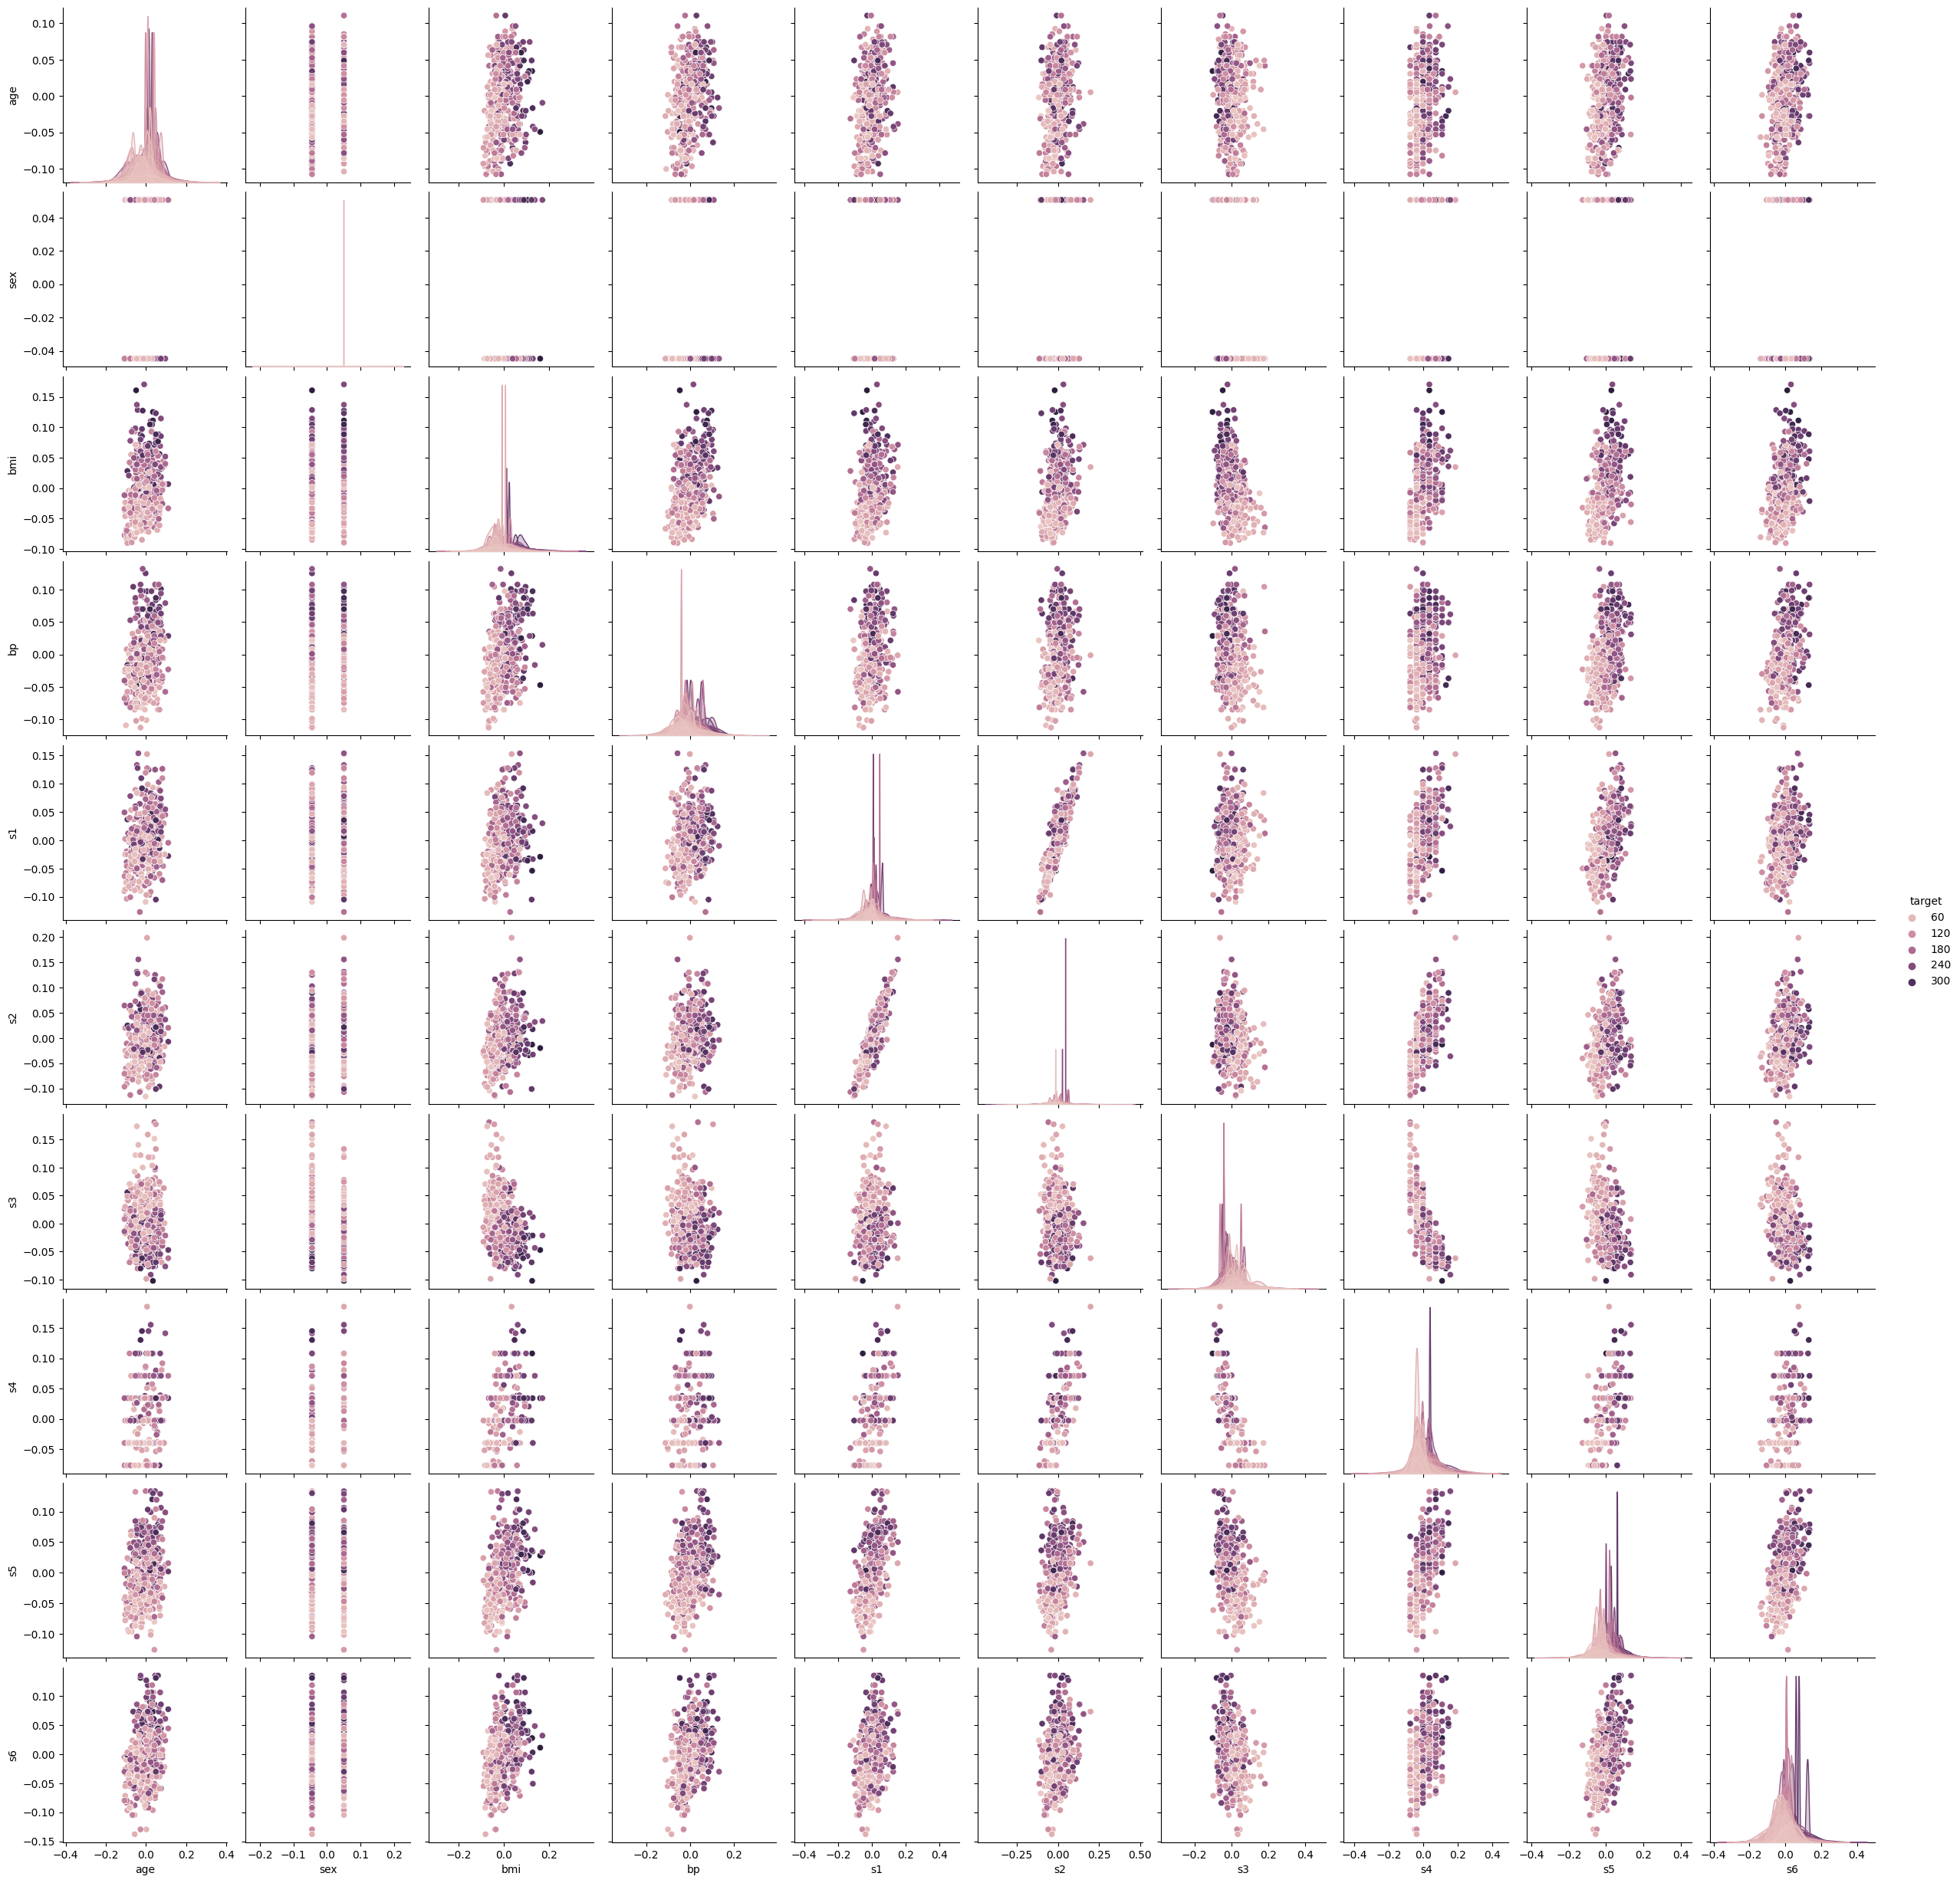

In [34]:
sns.pairplot(df, hue='target')

### Feature selection

In [107]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [108]:
def feature_selection(n_best_ft, Xtr, ytr, Xtest):
    ft = SelectKBest(f_regression, k = n_best_ft).fit(Xtr, ytr)
    scores_df = pd.DataFrame(ft.scores_)
    columns_df = pd.DataFrame(Xtr.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    Xtr_fs = ft.transform(Xtr)
    Xtest_fs = ft.transform(Xtest)
    return best_features, Xtr_fs, Xtest_fs

In [158]:
# divide il dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)


best_ft, X_train_fs, X_test_fs = feature_selection(6, X_train, y_train, X_test)

best_ft

,X_feature,Score
0,bmi,211.248454
1,s5,172.611433
2,bp,86.853782
3,s4,79.469119
4,s3,71.510659
5,s6,56.572185


In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error

def print_reg_metrics(y_pred, y_test):
    print("Mean squared error:", mean_squared_error(y_pred=y_pred, y_true=y_test))
    print("Mean absolute error:", mean_absolute_error(y_pred=y_pred, y_true=y_test))
    print("Max error:", max_error(y_pred=y_pred, y_true=y_test))

In [160]:
# Train the linear regressor
lr = LinearRegression()
lr.fit(X_train_fs, y_train)
y_pred = lr.predict(X_test_fs)

print_reg_metrics(y_pred, y_test)

Mean squared error: 3366.6799652261693
Mean absolute error: 46.54252944885691
Max error: 151.03144584667638


<AxesSubplot: xlabel='target', ylabel='Count'>

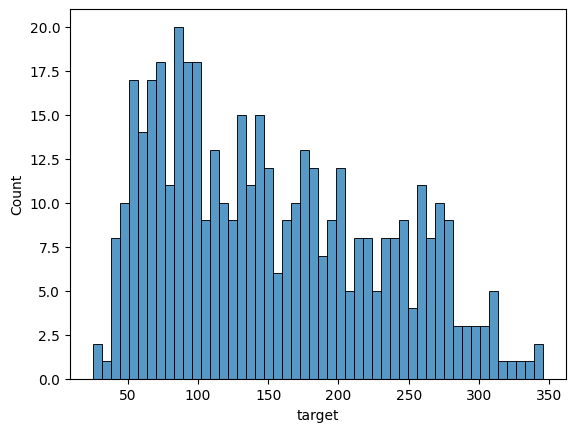

In [161]:
sns.histplot(diabetes.target, bins=50)

### Kfolding train and test

In [191]:
def kfold(X, y, fit_int, k):

    model = LinearRegression(fit_intercept=fit_int)

    r = len(y)//k

    for i in range(k):

        X_test   = X[i*r:r*(i+1)]
        y_test   = y[i*r:r*(i+1)]
        X_train = np.concatenate((X[:i*r], X[r*(i+1):]))
        y_train = np.concatenate((y[:i*r], y[r*(i+1):]))

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        print("Iteration", i)
        print_reg_metrics(y_pred, y_test)
    
    return model

In [192]:
best_model = kfold(X_train_fs, y_train, True, k=5)

Iteration 0
Mean squared error: 3189.859405440945
Mean absolute error: 46.3391018360408
Max error: 129.3706048596351
Iteration 1
Mean squared error: 3403.842190035413
Mean absolute error: 49.20408142375391
Max error: 113.84012950574203
Iteration 2
Mean squared error: 2870.544869781876
Mean absolute error: 44.14339066006347
Max error: 130.0659927542566
Iteration 3
Mean squared error: 2720.0943250498863
Mean absolute error: 42.235547844430734
Max error: 120.83888524564478
Iteration 4
Mean squared error: 2998.5425913372783
Mean absolute error: 45.02258311301922
Max error: 137.31598088577914


In [193]:
y_pred = best_model.predict(X_test_fs)
print_reg_metrics(y_pred, y_test)

Mean squared error: 3344.4751117717105
Mean absolute error: 46.32316441777124
Max error: 149.67442936123354
